<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.5rem;
    font-weight: 700;
    color: #049b0eff;
    margin-top: 20px;
    letter-spacing: 1px;
">
    🎵 Music Recommendation System
</h1>




<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1SHU7L3l71dbWbFFB1o6uPOBIRBqGCMBtMQ&s" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;">| <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiEe8OB0cT2Zr61W7YXW0_RVKhh1HzMkbZYA&s" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> 
---------|----------


## About Dataset
### **[Spotify Songs Dataset](https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset)**\
This is Spotify Million Song Dataset. This dataset contains song names, artists names, link to the song and lyrics. This dataset can be used for recommending songs, classifying or clustering songs.

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Import Libraries</h3>

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Loading the Data</h3>

In [2]:
df=pd.read_csv('spotify.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [3]:
df.shape

(57650, 4)

In [4]:
df.columns

Index(['artist', 'song', 'link', 'text'], dtype='object')

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">EDA</h3>

In [5]:
# Checking the Missing Values

df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [7]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Taking Samples (10000)</h3>

In [8]:
df = df.sample(20000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [9]:
df.shape

(20000, 3)

In [10]:
df.head()

,artist,song,text
0,Procol Harum,So Far Behind,"Your convent-cloistered, cluttered mind \r\n[..."
1,Roxette,Run Run Run,Go! Go! \r\nShe wants you every time that you...
2,Adele,River Lea,[Verse 1] \r\nEverybody tells me it's 'bout t...
3,Youth Of Today,Flame Still Burns,Made their threats ruin your name \r\nThought...
4,Smiths,Stretch Out And Wait,All the lies that you make up \r\nWhat's at t...


In [11]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)
# Wordcloud extracts most common words

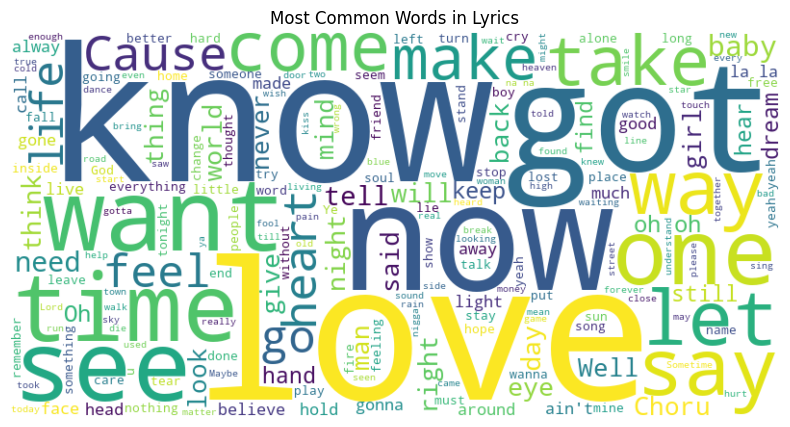

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [13]:
# Setting the stopwords
stop_words = set(stopwords.words('english'))

In [14]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [15]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [16]:
df.head()

,artist,song,text,cleaned_text
0,Procol Harum,So Far Behind,"Your convent-cloistered, cluttered mind \r\n[...",conventcloistered cluttered mind calls im behi...
1,Roxette,Run Run Run,Go! Go! \r\nShe wants you every time that you...,go go wants every time pass go go wishing coul...
2,Adele,River Lea,[Verse 1] \r\nEverybody tells me it's 'bout t...,verse everybody tells bout time moved need lea...
3,Youth Of Today,Flame Still Burns,Made their threats ruin your name \r\nThought...,made threats ruin name thought broken spirit r...
4,Smiths,Stretch Out And Wait,All the lies that you make up \r\nWhat's at t...,lies make whats back mind oh face see desperat...


In [17]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [18]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [19]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [20]:
df["song"][2]

'River Lea'

In [22]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("hello") 
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
           artist               song
5371         Glee              Hello
2691        Doors  Hello, I Love You
6287  Ace Of Base       Hallo, Hallo
9682   Eurythmics   Hello I Love You
6120  John Legend        We Loved It
